# Закономерности успеха видеоигр

**Цель исследования** — нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Анализ основан на исторических данных до конца 2016 года. Представим, что на календаре декабрь 2016-го, и задача — спрогнозировать ситуацию на 2017 год. Подход, применённый в этом проекте, будет универсален для будущих кампаний.

**Описание данных**
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы
Путь к файлу с данными: /datasets/games.csv

+ Name — название игры
+ Platform — платформа
+ Year_of_Release — год выпуска
+ Genre — жанр игры
+ NA_sales — продажи в Северной Америке (миллионы проданных копий)
+ EU_sales — продажи в Европе (миллионы проданных копий)
+ JP_sales — продажи в Японии (миллионы проданных копий)
+ Other_sales — продажи в других странах (миллионы проданных копий)
+ Critic_Score — оценка критиков (максимум 100)
+ User_Score — оценка пользователей (максимум 10)
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы**

1. Загрузим данные и изучим общую информацию
2. Сделаем предобработку данных
3. Проведем исследовательский анализ данных
4. Составим портрет пользователя каждого региона
5. Проверим гипотезы
6. Напишем общий вывод

**Ключевая особенность проекта:**

Важной составляющей анализа является влияние возрастного рейтинга ESRB на продажи в различных регионах. Это может существенно повлиять на выбор целевой аудитории для маркетинга.

**Важно:** 

Данные за 2016 год неполные — это необходимо учитывать при анализе и при формировании выводов.

## Загрузка данных и изучение общей информации

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод по общей информации**

    Всего строк: 16715
    Всего столбцов: 11
    Некоторые столбцы содержат пропущенные значения:
    Name: 2 пропуска
    Year_of_Release: 269 пропусков
    Genre: 2 пропуска
    Critic_Score: много пропусков — ~51%
    User_Score: ~40% пропусков и странный тип (объект, хотя должен быть числовым)
    Rating: тоже неполный (~40% пропусков)
    
*Резюме*

Данные требуют очистки и нормализации перед анализом.

## Предобработка данных

Приведем название столбцов к единому виду

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Удалим полные дубликаты

In [5]:
df = df.drop_duplicates()

print(df[df.duplicated(['name', 'platform', 'year_of_release'])].count())
print(df[df.duplicated(['name', 'platform', 'year_of_release'])])
df = df.drop_duplicates(['name', 'platform', 'year_of_release'])
print(df[df.duplicated(['name', 'platform', 'year_of_release'])].count())

name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64
                name platform  year_of_release   genre  na_sales  eu_sales  \
14244            NaN      GEN           1993.0     NaN       0.0      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score user_score rating  
14244      0.03          0.0           NaN        NaN    NaN  
16230      0.00          0.0          83.0        5.5      E  
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Обработаем пропуски

Обработка name

In [6]:
print('В столбце `name` нет значений в ', 
      (df['name'].isnull().sum() / len(df['name']) * 100).round(3), 
      '% данных.\nПри значении меньше 1 % примем решение удалить строки с пропусками в столбце `name`.\n'
      'Тогда всего пропусков останется:\n')
df = df.dropna(subset=['name'])
df.isna().sum()

В столбце `name` нет значений в  0.006 % данных.
При значении меньше 1 % примем решение удалить строки с пропусками в столбце `name`.
Тогда всего пропусков останется:



name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Обработка year_of_release

In [7]:
print('В столбце `year_of_release` нет значений в ', (df['year_of_release'].isnull().sum() / len(df['name'])*100).round(3), '% данных')

В столбце `year_of_release` нет значений в  1.61 % данных


In [8]:
df = df.dropna(subset=['year_of_release'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Обработка critic_score

In [9]:
df['critic_score'].isna().sum() / len(df['name'])*100

51.45654685884571

Количество пропусков больше 51 %. Заменить на медиану и среднее нецелесообразно, может исказить распределение данных — это слишком много пропусков, чтобы «угадать» корректную замену.

Пометим отрицательным значением "-1",чтобы оставить числовой тип данных и не мешать дальнейшей работе модели или анализу.

In [10]:
df['critic_score'] = df['critic_score'].fillna(-1)

Обработка user_score

In [11]:
df['user_score'].isna().sum() / len(df['name'])*100

40.16906890470109

Количество пропусков больше 40 %. Заменить на медиану и среднее нецелесообразно, может исказить распределение данных — это слишком много пропусков, чтобы «угадать» корректную замену.

Пометим отрицательным значением "-1",чтобы оставить числовой тип данных и не мешать дальнейшей работе модели или анализу.

In [12]:
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'].value_counts() 

-1     6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.9       2
1.3       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [13]:
df[df['user_score']=='tbd']['user_score'].count() / len(df['name'])*100

14.449917898193759

В столбце имеется оценка tbd не описанная в полученных данных, при этом ее значение больше 14%. Игнорировать это нельзя обозначим как "-1"

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1
df['user_score'].value_counts() 

-1     8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
1         2
1.9       2
1.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Обработка rating

In [15]:
df['rating'].isna().sum() / len(df['name'])*100

40.60086358936933

Количество пропусков больше 40 %. Заменить на медиану и среднее нецелесообразно, так как потеря информации слишком велика — это может исказить данные. Вместо числового заполнения — добавляем категориальное значение 'unknown'. Это даёт понять, что значение отсутствует, но при этом не искажает статистику числовыми заменами.

In [16]:
df['rating'] = df['rating'].fillna('unknown')
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Изменим тип столбцов**

In [17]:
df['year_of_release'] = (df['year_of_release']).astype('int')
df['critic_score'] = (df['critic_score']).astype('int')
df['user_score'] = (df['user_score']).astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Добавим столбец с суммарными продажами во всех регионах

In [18]:
df['total_sales'] = df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


Вывод по предобработке данных:

- Не найдено явных дубликатов.
- Удалены строки с неявными дубликатами, поиск осуществлялся одновременно по полям «name», «platform» и «year_of_release».
- В столбце «name» были удалены две строки с пропущенными значениями.
- В столбце «year_of_release» было принято решение удалить строки с пропущенными значениями.
- В столбце «critic_score» количество пропущенных значений превышает 51%, они обозначены как -1.
- В столбце «user_score» количество пропущенных значений превышает 40%, они также обозначены как -1. Значение «tbd» обозначено как -2.
- В столбце «rating» пропуски обозначены как «unknown».
- Поля «year_of_release» и «critic_score» были приведены к типу int, а поле «user_score» — к типу float в соответствии с данными, содержащимися в них.
- Суммарные продажи во всех регионах были рассчитаны и записаны в поле «total_sales».

*Резюме*

Пропуски могли возникнуть из-за сбора данных из различных источников, которые не были согласованы между собой, но сейчас данные подготовлены к анализу. Все важные типы приведены в порядок, пропуски обработаны.

## Исследовательский анализ данных

Исследуем выпуск игр по годам

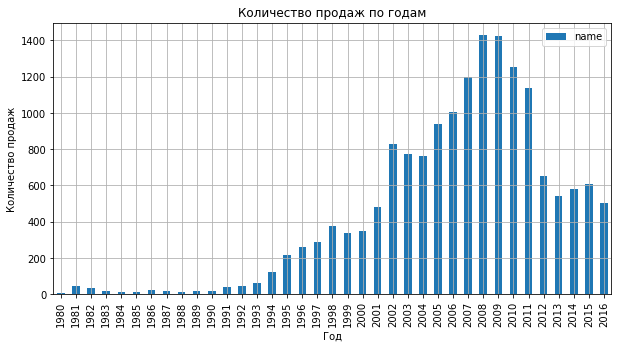

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [19]:
(
    df
    #.query('year_of_release > -1') #Строки с пропусками удалены
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
plt.title('Количество продаж по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

df[df['year_of_release'] > -1]['year_of_release'].describe()

Вывод

- В таблице представлены игры с выпуском с 1980 по 2016 год.
- Присутствуют игры у которых не указан год выпуска в количестве 269
- Рост числа выпуска игр приходится на 1995 год, с максимумом примерно в 2007 году после чего прослеживается спад.
- С 2012 года объем выпуска игр стабилизировался и год от года отличается несильно.
- В целях исследования логично выбрать период в 5 - 10 лет (старые игры забываются, новые сильнее влияют на рынок).

Исследуем продажи по платформам.

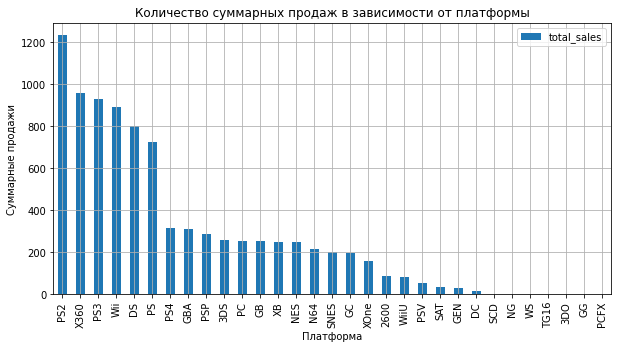

In [20]:
(
    df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
plt.title('Количество суммарных продаж в зависимости от платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

Наибоше суммарных продаж зафиксировано у 6 платформ

In [21]:
top_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().head(6)['platform'].tolist()
top_sales

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

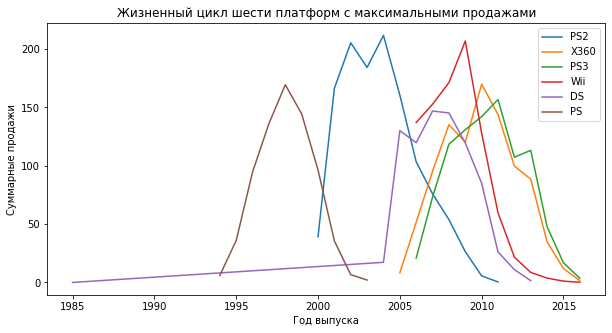

In [22]:
for name in top_sales:
    (
    df.query('platform == @name and year_of_release > -1')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label=name)
    )
    plt.title('Жизненный цикл шести платформ с максимальными продажами')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

Проанализируем артефакт на графике по консоли DS

In [23]:
print(df.query('platform == "DS" and year_of_release < 1990'))

                                      name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0            -1        -1.0   

        rating  total_sales  
15957  unknown         0.02  


В данных только одна строка и это явная ошибка возникшая при заполнении данных в столбце name Принимаем решение удалить эту строку по её индексу и перестроить график жизненного цикла консолей.

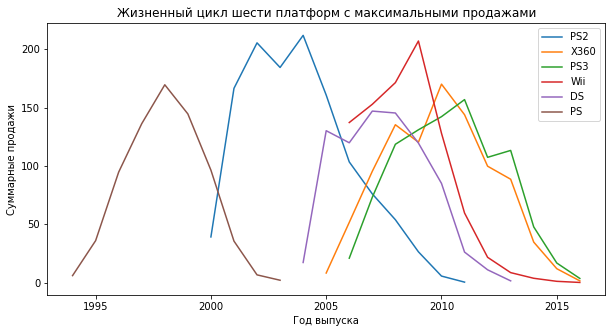

In [24]:
df = df.drop(index = 15957)
for name in top_sales:
    (
    df.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label=name)
    )
    plt.title('Жизненный цикл шести платформ с максимальными продажами')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

Расчитаем время жизненного цикла по всем данным

In [25]:
time_life = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
# в срок жизни платформы, должны входить границы диапазона, поэтому +1
time_life['life'] = time_life['max'] - time_life['min'] + 1 
print('Медианное значение жизненного цикла по всей выборке', time_life['life'].median(), 'лет')

Медианное значение жизненного цикла по всей выборке 7.0 лет


В исследовании нас больше интерисует, когда продажи по платформам растут или когда она находится на пике а это первая nhtnm жизненного цикла платформ, с округлением в меньшую сторону.

In [26]:
t = np.floor(time_life['life'].median()/3)
print('Определим актуальный период за последние', t, 'года')

Определим актуальный период за последние 2.0 года


Вывод по исследованию платформ

Из графиков видно, что от срока появления платформы до их исчезновения как правило проходит 10 лет, следовательно для нас интересны платформы релиз которых состоялся 3-5 годами ранее и которые активно растут в продажах. Определим, что актуальный период составляет 2 последних года.

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит
        
        Определим, что актуальный период составляет 4 последних года.

Исследование перспективных платформ

In [27]:
actual_platforms = (df
    .query('year_of_release >= 2016-@t')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(10)['platform'].tolist()
    )                         
actual_platforms

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

In [28]:
actual_df = df.query('year_of_release >= 2016-@t').copy().reset_index(drop= True)
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,unknown,7.98


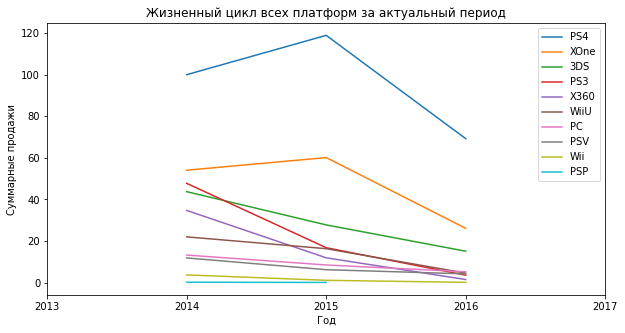

In [29]:
for name in actual_platforms:
    (
    actual_df.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(kind='line', figsize = (10, 5), label=name)
    )
    plt.title('Жизненный цикл всех платформ за актуальный период')
    plt.xticks(np.arange(2013, 2018, step=1))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

Из графика видно, что на 2016 год нет явно возрастающих продаж по консолям, продажи падают на всех консолях. Более или менее перспективными являются консоли PS4 и XOne но у них также прослеживаются уменьшения продаж.

Исследуем "Boxplot" - «ящик с усами» по глобальным продажам игр в разбивке по платформам актуального периода.

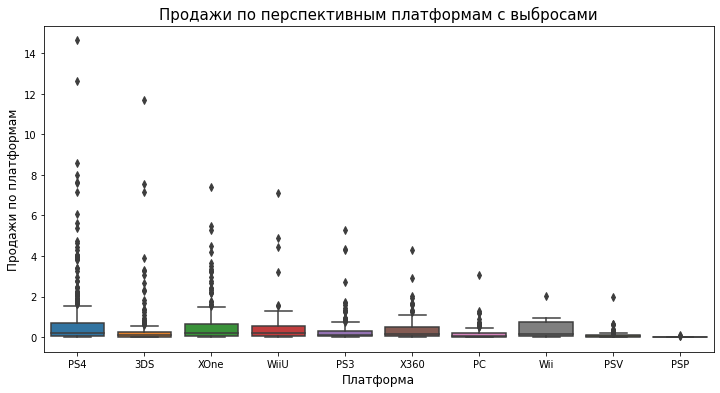

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(data=actual_df, x='platform', y='total_sales')
plt.title('Продажи по перспективным платформам с выбросами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи по платформам',fontsize=12);

In [31]:
actual_df['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

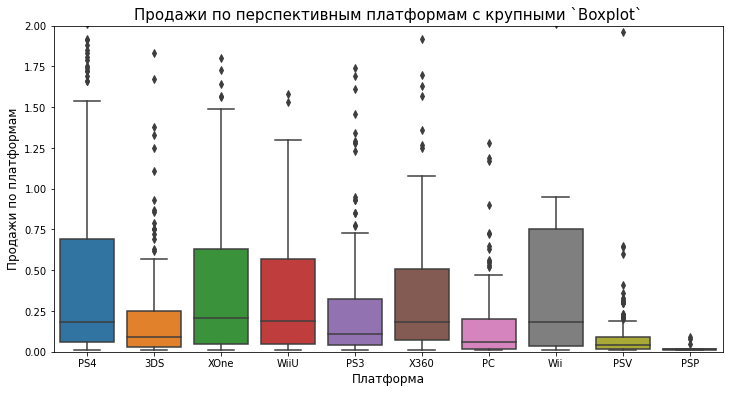

In [32]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_df, x='platform', y='total_sales')
ax.set(ylim=(0,2))
plt.title('Продажи по перспективным платформам с крупными `Boxplot`', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи по платформам',fontsize=12);

Вывод по построению диаграммы Boxplot

Описательная статистика данных за актуальный период указывает, что:

- Медианное значение по всей выборке составляет 0,12 но у большинства консолей данный показатель не совпадает с основным.
- По первой и третьей квартили также наблюдается большой разброс.
- По всем консолям присутствуют выбросы по продажам.

Влияние отзывов на продажи

In [33]:
#Отберем 5 платформ с максимальными продажами
actual_platforms_5 = (actual_df
    
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(5)['platform'].tolist()
    )                         
actual_platforms_5

['PS4', 'XOne', '3DS', 'PS3', 'X360']

Построим диаграмму распределения и вычислим корреляцию между оценкой пользователей и продажами в разрезе отдельных платформ

Корреляция между оценками пользователей и продажами по платформе PS4  = -0.040131589472697356


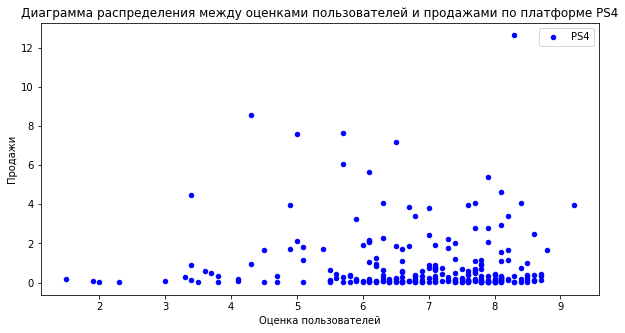

Корреляция между оценками пользователей и продажами по платформе XOne  = -0.0703839280647581


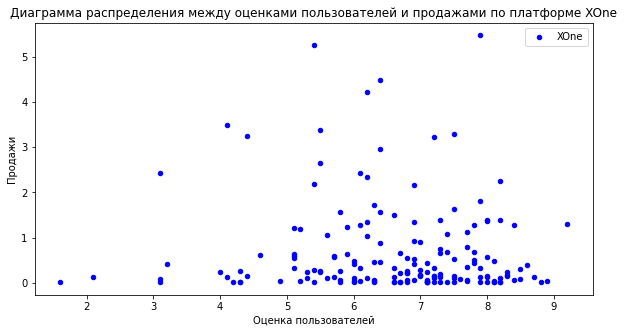

Корреляция между оценками пользователей и продажами по платформе 3DS  = 0.2151932718527028


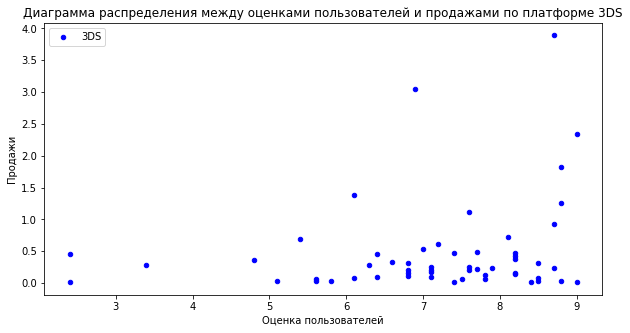

Корреляция между оценками пользователей и продажами по платформе PS3  = -0.16676141347662118


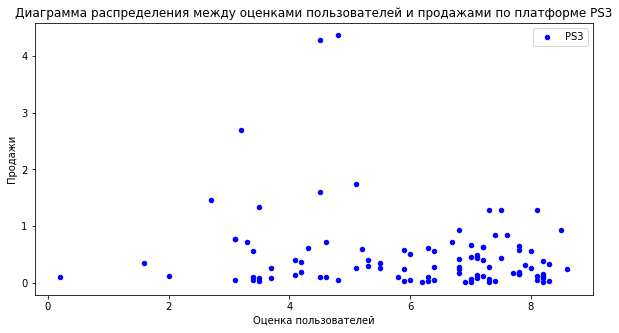

Корреляция между оценками пользователей и продажами по платформе X360  = -0.138444570945665


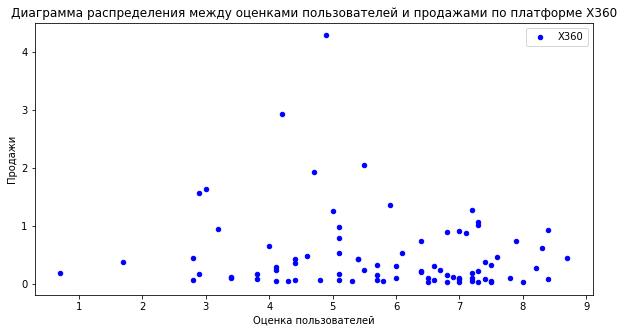

In [34]:
for name in actual_platforms_5:
    (
    actual_df
        .query('platform == @name and user_score > -1')
        .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='blue')
    )
    plt.title(f'Диаграмма распределения между оценками пользователей и продажами по платформе {name}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.legend([name])
    print(f'Корреляция между оценками пользователей и продажами по платформе {name}  =', actual_df.query('platform == @name and user_score > -1')['user_score'].corr(actual_df.query('platform == @name and user_score > -1')['total_sales']))
    plt.show()

Диаграммы распределения явно показывают на слабую связь между оценкой пользователей и продажами в разрезе отдельных платформ, соответствующий коэффициент корреляции подтверждает это (лишь в некоторых случаях он приближается к 0,2).

Построим диаграмму распределения и вычислим корреляцию между оценкой критиков и продажами в разрезе отдельных платформ

Корреляция между оценками критиков и продажами по платформе PS4  = 0.40266141068104083


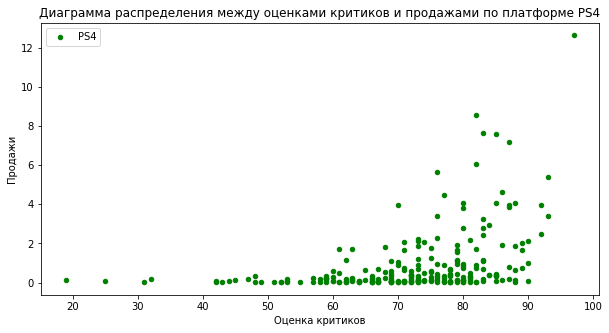

Корреляция между оценками критиков и продажами по платформе XOne  = 0.42867694370333226


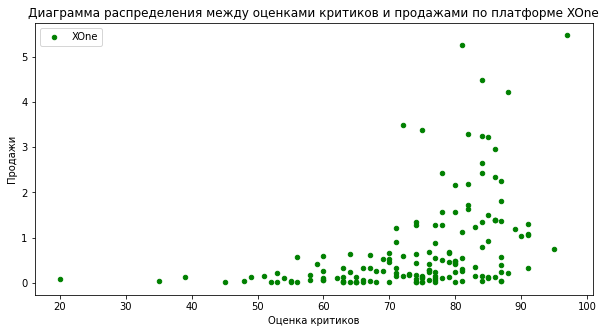

Корреляция между оценками критиков и продажами по платформе 3DS  = 0.314117492869051


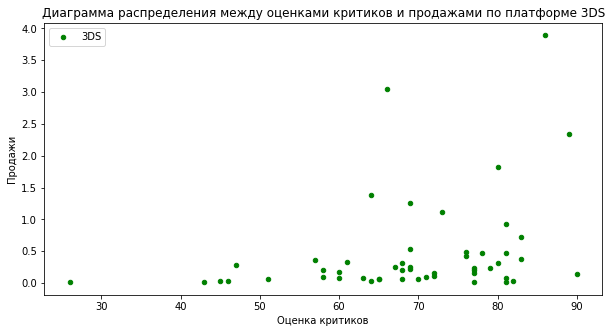

Корреляция между оценками критиков и продажами по платформе PS3  = 0.44657460493190704


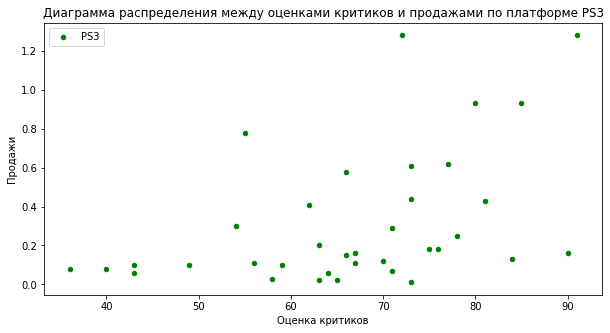

Корреляция между оценками критиков и продажами по платформе X360  = 0.5257228356581523


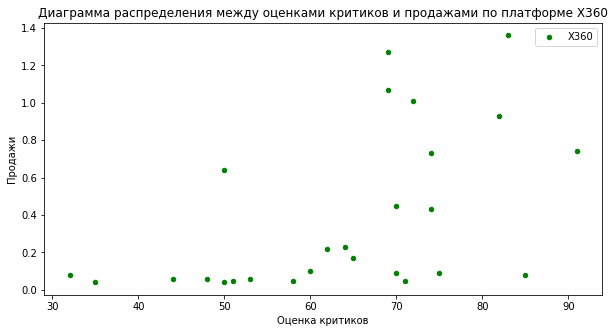

In [35]:
for name in actual_platforms_5:
    (
    actual_df
        .query('platform == @name and critic_score > -1')
        .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='green')
    )
    plt.title(f'Диаграмма распределения между оценками критиков и продажами по платформе {name}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.legend([name])
    print(f'Корреляция между оценками критиков и продажами по платформе {name}  =', actual_df.query('platform == @name and critic_score > -1')['critic_score'].corr(actual_df.query('platform == @name and critic_score > -1')['total_sales']))
    plt.show()

Диаграммы распределения явно показывают на умеренную связь между оценкой критиков и продажами в разрезе отдельных платформ, соответствующий коэффициент корреляции подтверждает это (колеблется от 0,32 до 0,42).

Сделаем аналогичные расчеты для всего набора данных.

In [36]:
print('Общая корреляция между оценками пользователей и продажами = ', actual_df.query('user_score > -1')['user_score'].corr(actual_df['total_sales']))
print('Общая корреляция между оценками критиков и продажами = ', actual_df.query('critic_score > -1')['critic_score'].corr(actual_df['total_sales']))

Общая корреляция между оценками пользователей и продажами =  -0.013070305002484585
Общая корреляция между оценками критиков и продажами =  0.328105086966363


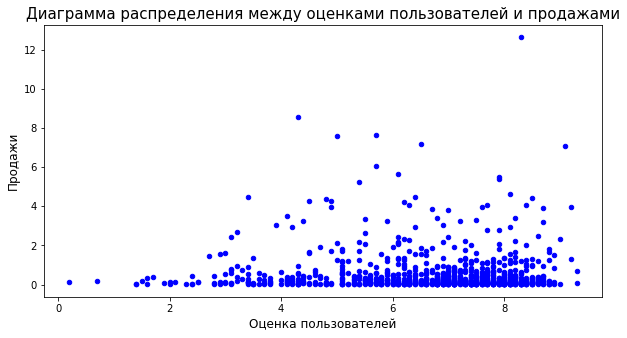

In [37]:
(
 actual_df.query('user_score > -1')
    .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='blue')
)
plt.title('Диаграмма распределения между оценками пользователей и продажами', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

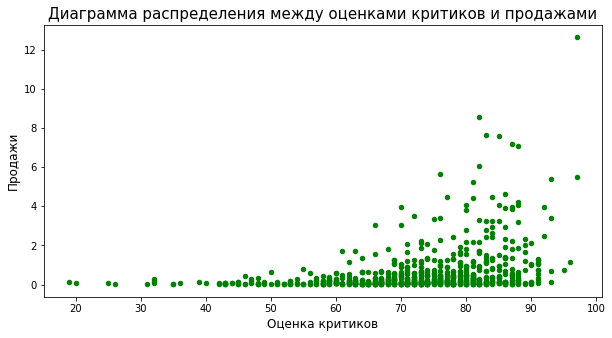

In [38]:
(
 actual_df.query('critic_score > -1')
    .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5), 
          color='green')
)
plt.title('Диаграмма распределения между оценками критиков и продажами', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

Расчитанная корреляция по актуальному периоду указывает что:
- Диаграммы распределения явно показывают на слабую связь между оценкой пользователей и продажами по всей совокупности данных (приближается к 0,004).
- Диаграммы распределения явно показывают на умеренную связь между оценкой критиков и продажами в разрезе отдельных платформ, соответствующий коэффициент корреляции подтверждает это (приближается к 0,31).

Выводы по исследованию оценок на продажи

Диаграммы зависимости оценок на показатели продаж и коэффициенты корреляции по отдельным платформам указывают, что:

- между оценками пользователей и продажами слабая связь и нелинейная
- между оценками критиков и продажами связь умеренная и скорее всего нелинейная

По отношению к общим показателям значения даже больше, что указывает на то что, по всем платформам:

- между оценками пользователей и продажами слабая связь и нелинейная
- между оценками критиков и продажами связь умеренная и скорее всего нелинейная

Исследование распределения игр по жанрам

Построим сумму прожах по жанрам.В разрезе жанров определим самые прибыльные и и определим сумму продаж

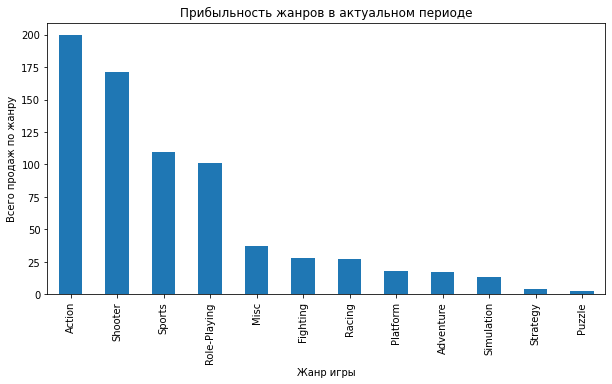

In [39]:
(actual_df
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False,title = 'Прибыльность жанров в актуальном периоде')
 .set(xlabel='Жанр игры', ylabel='Всего продаж по жанру'))

plt.show()

Построим диаграмму размаха

Text(0, 0.5, 'Продажи по жанрам')

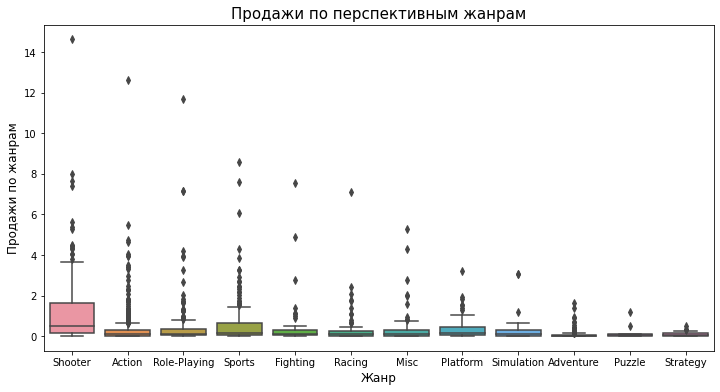

In [40]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_df, x='genre', y='total_sales')
plt.title('Продажи по перспективным жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи по жанрам',fontsize=12)

Text(0, 0.5, 'Продажи по жанрам')

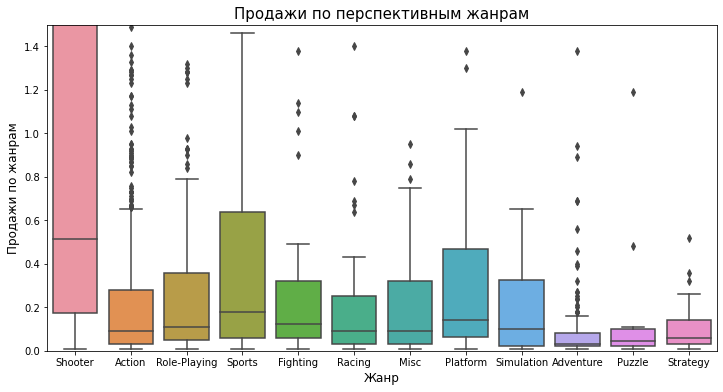

In [41]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_df, x='genre', y='total_sales')
ax.set(ylim=(0,1.5))
plt.title('Продажи по перспективным жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи по жанрам',fontsize=12)

In [42]:
(
 actual_df
 .pivot_table(index='genre', values='total_sales', aggfunc='median')
 .sort_values('total_sales', ascending=False)
)

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


Вывод по исследованию игр по жанрам

- В течение последних двух лет наиболее востребованными среди потребителей являются жанры Action и Shooter.

- Проведённое дополнительное исследование и сравнение средних показателей продаж по жанрам показало, что среди них наиболее прибыльными являются жанры Shooter и Sports.

Вывод по исследовательскому анализу данных

- В целях исследования логично выбрать период в 5 - 10 лет (старые игры забываются, новые сильнее влияют на рынок).
- Определили, что актуальный период составляет 2 последних года.
- На 2016 год нет явно возрастающих продаж по консолям, продажи падают на всех консолях. Более или менее перспективными являются консоли PS4 и XOne, но у них также прослеживаются уменьшения продаж.
- Между оценками пользователей и продажами слабая связь и нелинейная
- Между оценками критиков и продажами связь умеренная и скорее всего нелинейная
- Предпочтение в жанрах надо отдавать Shooter, Sports обладающих большим медианным значением прибыли

## Портрет пользователя каждого региона

Топ-5 самых популярных платформ по регионам

In [43]:
na = (
      actual_df
        .pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )
na.loc[5:,'platform'] = 'Other'
na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum().round(2)
na = na.iloc[0:6, :]
eu = (
      actual_df
        .pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )
eu.loc[5:,'platform'] = 'Other'
eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum().round(2)
eu = eu.iloc[0:6, :]
jp = (
      actual_df
        .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )
jp.loc[5:,'platform'] = 'Other'
jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum().round(2)
jp = jp.iloc[0:6, :]
ps = pd.merge(na, eu, left_index=True, right_index=True)
ps = pd.merge(ps, jp, left_index=True, right_index=True)
ps.rename(columns = {'platform_x':'na_platform', 'platform_y':'eu_platform', 'platform':'jp_platform'}, inplace = True )
ps

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,PS4,98.61,PS4,130.04,3DS,44.24
1,XOne,81.27,XOne,46.25,PS4,15.02
2,X360,28.30,PS3,25.54,PSV,14.54
3,3DS,22.64,PC,17.97,PS3,11.22
4,PS3,22.05,3DS,16.12,WiiU,7.31
5,Other,31.19,Other,34.76,Other,0.76


In [44]:
data = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 
        'platform': ['na_platform', 'eu_platform', 'jp_platform'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']} 
regions = pd.DataFrame(data) 
regions

,region,platform,sales
0,NA - Америка,na_platform,na_sales
1,EU - Европа,eu_platform,eu_sales
2,JP - Япония,jp_platform,jp_sales


In [45]:
print('ТОП - 5 платформ по регионам NA, EU, JP и доли продаж по ним')
ps.na_sales = round(ps.na_sales/ps.na_sales.sum()*100, 2)
ps.eu_sales = round(ps.eu_sales/ps.eu_sales.sum()*100, 2)
ps.jp_sales = round(ps.jp_sales/ps.jp_sales.sum()*100, 2)
ps

ТОП - 5 платформ по регионам NA, EU, JP и доли продаж по ним


,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,PS4,34.71,PS4,48.04,3DS,47.52
1,XOne,28.61,XOne,17.09,PS4,16.13
2,X360,9.96,PS3,9.44,PSV,15.62
3,3DS,7.97,PC,6.64,PS3,12.05
4,PS3,7.76,3DS,5.96,WiiU,7.85
5,Other,10.98,Other,12.84,Other,0.82


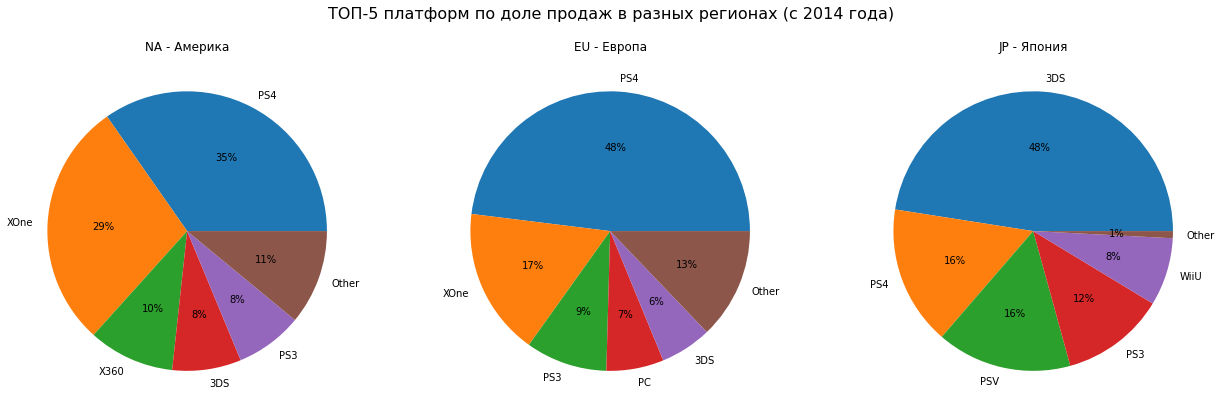

In [46]:
# Функция для получения топ-5 + 'Other'
def top_platforms_by_region(df, region_col):
    platform_sales = (
        df
        .pivot_table(index='platform', values=region_col, aggfunc='sum')
        .sort_values(by=region_col, ascending=False)
        .reset_index()
    )
    platform_sales.loc[5:, 'platform'] = 'Other'
    platform_sales.loc[5, region_col] = platform_sales.loc[5:, region_col].sum()
    return platform_sales.iloc[:6]

# Получаем топ-5 платформ для каждого региона
na = top_platforms_by_region(actual_df, 'na_sales')
eu = top_platforms_by_region(actual_df, 'eu_sales')
jp = top_platforms_by_region(actual_df, 'jp_sales')

# Настроим визуализацию в одной строке
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('ТОП-5 платформ по доле продаж в разных регионах (с 2014 года)', fontsize=16)

# Списки для удобства перебора
regions = [('NA - Америка', na, 'na_sales'),
           ('EU - Европа', eu, 'eu_sales'),
           ('JP - Япония', jp, 'jp_sales')]

# Строим три pie-графика
for ax, (title, data, col) in zip(axes, regions):
    data.plot(kind='pie',
              y=col,
              labels=data['platform'],
              autopct='%1.0f%%',
              legend=False,
              ax=ax,
              ylabel='')
    ax.set_title(title)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Отступ для общего заголовка
plt.show()

In [47]:
# Check
(
      actual_df
        .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
)

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08
8,PC,0.00
9,Wii,0.00


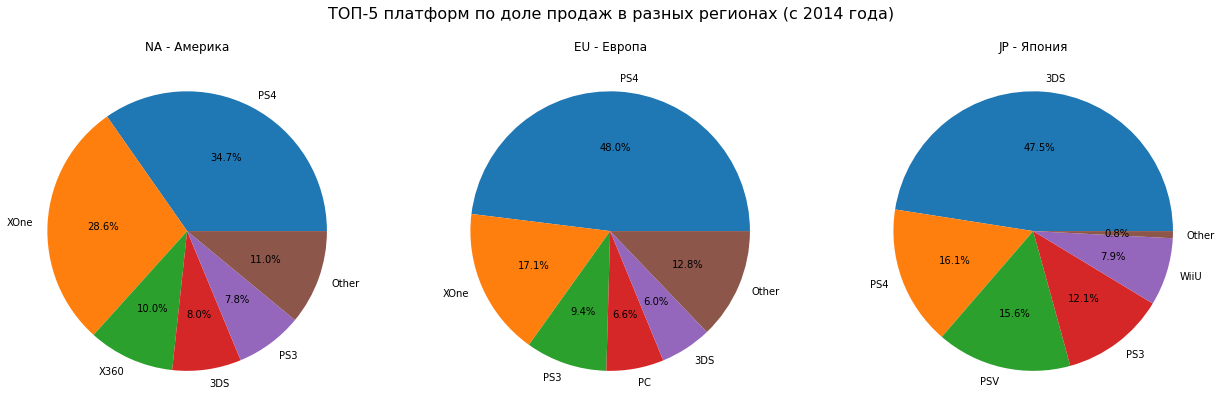

In [48]:
import matplotlib.pyplot as plt

# Обновлённая функция для расчёта долей продаж с корректным 'Other'
def top_platforms_by_region(df, region_col, top_n=5):
    total_sales = df.groupby('platform')[region_col].sum().sort_values(ascending=False)
    
    top = total_sales.head(top_n)
    other = total_sales.iloc[top_n:].sum()
    
    # Объединяем в один Series
    result = top.append(pd.Series({ 'Other': other }))
    return result

# Получаем скорректированные топ-5 платформ для каждого региона
na = top_platforms_by_region(actual_df, 'na_sales')
eu = top_platforms_by_region(actual_df, 'eu_sales')
jp = top_platforms_by_region(actual_df, 'jp_sales')

# Настроим визуализацию в одной строке
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('ТОП-5 платформ по доле продаж в разных регионах (с 2014 года)', fontsize=16)

# Списки для перебора
regions = [('NA - Америка', na),
           ('EU - Европа', eu),
           ('JP - Япония', jp)]

# Строим круговые диаграммы
for ax, (title, data) in zip(axes, regions):
    data.plot(kind='pie',
              autopct='%1.1f%%',
              labels=data.index,
              legend=False,
              ax=ax,
              ylabel='')
    ax.set_title(title)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Выделили топ 5 платформ по регионам

Выяснилось что пользователи по регионам в основном используют платформы в соответствии с долями указанными в таблице выше.
В топ в регионах NA и EU входят одинаковые платформы с перестановкой их предпочтения.
На на рынке JP присутствуют специализированные региональные платформы. Платформа 3DS занимает 47,5% рынка

Топ-5 самых популярных жанров по регионам

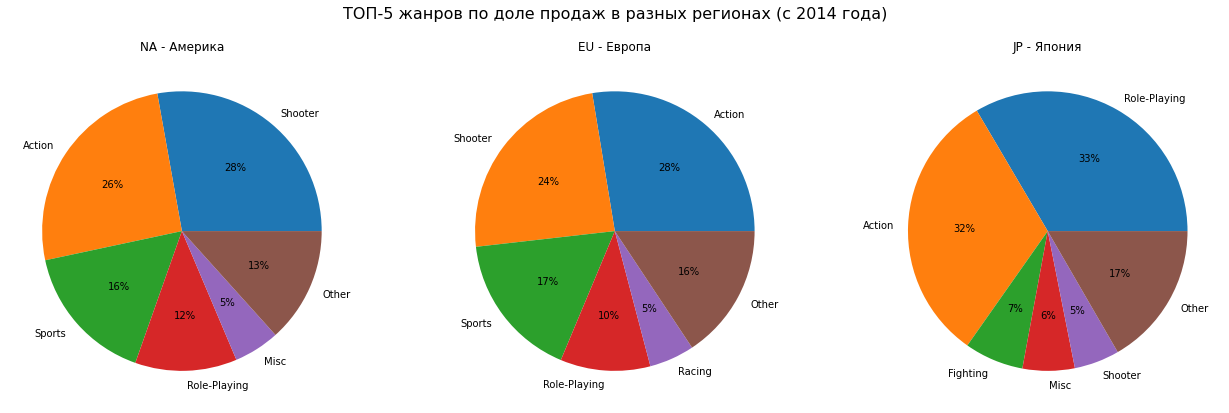

In [49]:
# Функция для получения топ-5 жанров по региону
def top_genres_by_region(df, region_col):
    genre_sales = (
        df
        .pivot_table(index='genre', values=region_col, aggfunc='sum')
        .sort_values(by=region_col, ascending=False)
        .reset_index()
    )
    genre_sales.loc[5:, 'genre'] = 'Other'
    genre_sales.loc[5, region_col] = genre_sales.loc[5:, region_col].sum()
    return genre_sales.iloc[:6]

# Получаем данные по актуальному периоду
actual_df = df[df['year_of_release'] >= 2014]

# Получаем топ-5 жанров по регионам
na_genres = top_genres_by_region(actual_df, 'na_sales')
eu_genres = top_genres_by_region(actual_df, 'eu_sales')
jp_genres = top_genres_by_region(actual_df, 'jp_sales')

# Построим графики
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('ТОП-5 жанров по доле продаж в разных регионах (с 2014 года)', fontsize=16)

# Списки для удобства перебора
regions = [('NA - Америка', na_genres, 'na_sales'),
           ('EU - Европа', eu_genres, 'eu_sales'),
           ('JP - Япония', jp_genres, 'jp_sales')]

# Рисуем pie-графики
for ax, (title, data, col) in zip(axes, regions):
    data.plot(kind='pie',
              y=col,
              labels=data['genre'],
              autopct='%1.0f%%',
              legend=False,
              ax=ax,
              ylabel='')
    ax.set_title(title)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Отступ для общего заголовка
plt.show()

Выделили топ 5 жанров по регионам

Выяснилось что пользователи по регионам предпочитают жанры игр в соответствии с долями указанными в таблице выше. В топ в регионах NA и EU входят одинаковые жанры почти с одинаковым распределением. На рынке JP предпочитают Role-Playing, Action которые суммарно занимают почти 60% рынка.

Влияние рейтинга ESRB на продажи в регионах

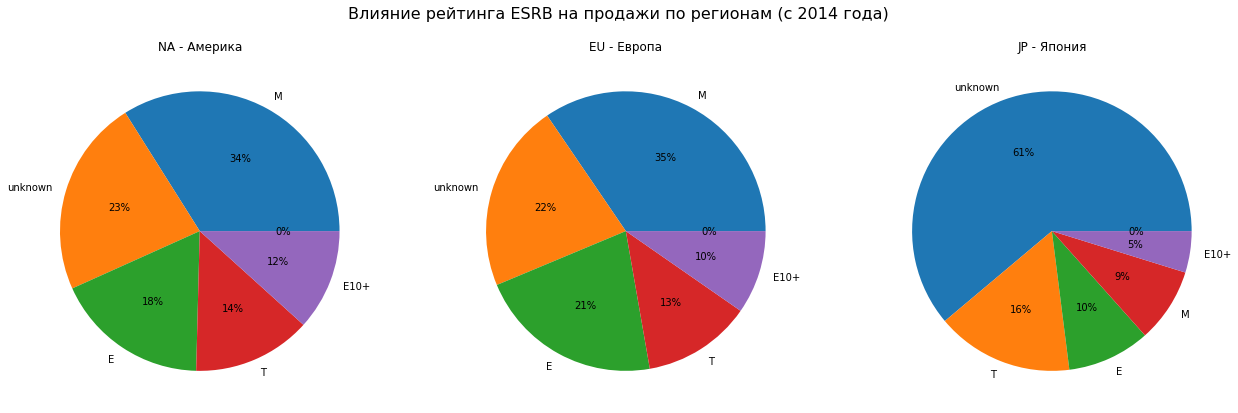

In [50]:

# Функция для топ-рейтингов по региону
def top_ratings_by_region(df, region_col):
    rating_sales = (
        df
        .pivot_table(index='rating', values=region_col, aggfunc='sum')
        .sort_values(by=region_col, ascending=False)
        .reset_index()
    )
    rating_sales.loc[5:, 'rating'] = 'Other'
    rating_sales.loc[5, region_col] = rating_sales.loc[5:, region_col].sum()
    return rating_sales.iloc[:6]

# Получаем данные по ESRB рейтингам с учётом фильтрации
na_ratings = top_ratings_by_region(actual_df, 'na_sales')
eu_ratings = top_ratings_by_region(actual_df, 'eu_sales')
jp_ratings = top_ratings_by_region(actual_df, 'jp_sales')

# Рисуем графики
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Влияние рейтинга ESRB на продажи по регионам (с 2014 года)', fontsize=16)

# Списки регионов
regions = [('NA - Америка', na_ratings, 'na_sales'),
           ('EU - Европа', eu_ratings, 'eu_sales'),
           ('JP - Япония', jp_ratings, 'jp_sales')]

for ax, (title, data, col) in zip(axes, regions):
    data.plot(kind='pie',
              y=col,
              labels=data['rating'],
              autopct='%1.0f%%',
              legend=False,
              ax=ax,
              ylabel='')
    ax.set_title(title)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Резюме по рейтингу ESRB

В регионах NA и EU большая часть продаж приходится на рейтинг "M" (для взрослых) - 34-35% на втором месте с рейтингом для всех "Е" 18-21%, на рынке JP первое место занимают игры с неуказанным рейтингом "unknown" - 61%, затем игры  "T" - 16%.

Вывод по портрету пользователя в зависимости от региона
Портрет пользователя в регионах NA и EU почти совпадает.Лидирует платформа PS4, PS3, X360 жанры Action, Sports игры с рейтингом M- для взрослых
Портрет пользователя из региона JP консоль 3DS, PS3 жанр Role-Playing, Action игры с неуказанным рейтингом unknown


## Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выдвинем гипотезы:
- Н0: Средние пользовательские рейтинги платформ XOne и PC равны
- Н1: Средние пользовательские рейтинги платформ XOne и PC не равны

In [51]:
# Учитываем только игры, выпущенные с момента появления XOne 
filtered_df = df[df['year_of_release'] >= 2013]

# Отбираем данные по платформам и фильтруем валидные пользовательские оценки
xone = filtered_df.query('platform == "XOne" and user_score.notnull() and user_score > 0')
pc = filtered_df.query('platform == "PC" and user_score.notnull() and user_score > 0')

# Описательная статистика
print('Описательная статистика пользовательских рейтингов по XOne\n')
print(xone['user_score'].describe())

print('\nОписательная статистика пользовательских рейтингов по PC\n')
print(pc['user_score'].describe())

Описательная статистика пользовательских рейтингов по XOne

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Описательная статистика пользовательских рейтингов по PC

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64


In [52]:
alpha = 0.05

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'],
    equal_var=False, #для различных дисперсий
    alternative='two-sided') #для проверки на неравенство (в обе стороны)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


p-value — это вероятность получить разницу в средних значениях рейтингов, равную или больше той, что мы наблюдаем в выборке, при условии, что в реальности такие различия не существуют (то есть при условии, что нулевая гипотеза верна).

В нашем случае p-value = 0.14759 — это 14.76% вероятность случайно получить такую разницу между XOne и PC, даже если у них одинаковые рейтинги.
Это означает, что при условии, что средние рейтинги действительно равны, вероятность получить разницу между выборками не меньше наблюдаемой составляет примерно 14,76%. Такая вероятность слишком велика, чтобы считать результат статистически значимым.

Вывод:
Мы не отвергаем нулевую гипотезу — у нас нет статистических оснований утверждать, что пользовательские рейтинги на XOne и PC различаются. Но это не означает, что они точно равны — просто различия не доказаны в рамках выбранного уровня значимости (5%).

In [53]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Будем исходить от противного
Выдвинем гипотезы:

- Н0: Средние пользовательские рейтинги жанров Action и Sports равны
- Н1: Средние пользовательские рейтинги жанров Action и Sports не равны

Если отвергнем нулевую гипотезу, то подтвердим их разность

In [54]:
action = actual_df.query('genre == "Action" and user_score > 0')
print('Описательная статистика пользовательских рейтингов по Action\n\n', action['user_score'].describe())
sports = actual_df.query("genre == 'Sports' and user_score > 0")
print('Описательная статистика пользовательских рейтингов по Sports\n\n', sports['user_score'].describe())

Описательная статистика пользовательских рейтингов по Action

 count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64
Описательная статистика пользовательских рейтингов по Sports

 count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64


In [55]:
alpha = 0.05

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],
    equal_var=False, #для различных дисперсий
    alternative='two-sided') #для проверки на неравенство (в обе стороны)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


Вывод по пользовательским рейтингам и жанрам Action и Sports

Нулевая гипотеза была отвергнута. Это позволяет сделать вывод, что наблюдаемые различия в пользовательских рейтингах для жанров Action и Sports статистически значимы на уровне значимости 5 %. Следовательно, можно считать, что рейтинги этих жанров, скорее всего, различаются.

Вывод по гипотезам

Нет оснований отвергнуть нулевую гипотезу, следовательно, имеющиеся данные не противоречат предположению о равенстве пользовательских рейтингов на платформах XOne и PC при уровне значимости 5 %. Это означает, что статистически значимых различий в рейтингах между этими платформами не обнаружено.

Нулевая гипотеза о равенстве рейтингов жанров Action и Sports была отвергнута. Таким образом, различия между рейтингами этих жанров являются статистически значимыми на уровне значимости 5 %.

Нулевая и альтернативная гипотезы
- Первая задача
    - Задаваемый вопрос "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?" полностью совпадает с фольмулировкой нулевой гипотезы (которая всегда определяется как равна) Н0: Средние пользовательские рейтинги платформ XOne и PC равны.
    - Альтернативная гипотеза может быть проверена в трех направлениях "меньше", "не равно", "больше" в нашем случае ставится вопрос про равенство, значит проверку надо провести двухстороннюю alternative='two-sided'
- Вторая задача
    - Задаваемый вопрос "Средние пользовательские рейтинги жанров Action и Sports разные?" не может быть проверен прямо, ведь нулевая гипотеза должна быть всегда равна, поэтому выдвинута нулевая гипотеза как равна Н0: Средние пользовательские рейтинги жанров Action и Sports равны, в данном случае если мы отвергнем нулевую гипотезу, значит подтвердим, что рейтинги разные.
    - Альтернативная гипотеза может быть проверена в трех направлениях "меньше", "не равно", "больше" в нашем случае ставится вопрос про не равенство, значит проверку надо провести двухстороннюю alternative='two-sided'

В результате предыдущего анализа было установлено, что выборочные средние имеют нормальное распределение, а количество наблюдений в выборках превышает 30. Это означает, что исходные значения также должны быть распределены нормально. Следовательно, для проверки гипотез можно использовать статистические методы анализа и t-критерий Стьюдента.

Статистические методы Python оперируют с P-значением, которое представляет собой вероятность того, что случайная величина примет значение, равное или превышающее наблюдаемое, при условии, что нулевая гипотеза верна. P-значение связано с площадью под кривой нормального распределения.

Для подтверждения или опровержения гипотезы необходимо установить уровень значимости. Обычно его выбирают из ряда значений от 1 до 10% в зависимости от изученности данных и требований к ним. Чаще всего уровень значимости составляет 5%.

Дополнительная проверка данных на размерность и дисперсию (среднеквадратическое отклонение) указывает на необходимость использования метода ttest_ind с параметром equal_var=False.

## Общий вывод

В процессе анализа данных о продажах игр, отзывах пользователей и экспертов, а также информации о жанрах и платформах были разработаны методы работы с данными для выявления закономерностей, влияющих на успех игры. Были выполнены следующие этапы работы:

1. Изучение общей информации

В таблице с данными было обнаружено 16715 строк и 11 столбцов. В шести столбцах были пропуски данных, а названия столбцов не соответствовали требованиям к оформлению. Кроме того, некоторые столбцы имели неправильный тип данных.

2. Предобработка данных

Были удалены явные дубликаты данных. Также были удалены строки с неявными дубликатами, которые были найдены по трём столбцам: name, platform и year_of_release. В столбце name были удалены две строки с пропусками данных. В столбце year_of_release было принято решение удалить строки с пропусками. В столбце critic_score было обнаружено более 51% пропусков, которые были обозначены как -1. В столбце user_score было обнаружено более 40% пропусков, которые также были обозначены как -1. В столбце rating были обнаружены пропуски, которые были обозначены как unknown.

Столбцы year_of_release и critic_score были приведены к типам int и float соответственно, а столбец user_score был приведён к типу float. Пропуски данных могли возникнуть из-за того, что данные были собраны из разных источников, которые не были согласованы между собой.

3. Исследование данных

Для анализа данных был выбран период в 5-10 лет, так как старые игры забываются, а новые сильнее влияют на рынок. 

Определили, что актуальный период составляет 2 последних года.

В 2016 году не было явного роста продаж на консолях. Наиболее перспективными консолями были PS4 и XOne, но и у них наблюдалось снижение продаж. Важно учитывать, что данные за 2016 год неполные, поэтому тренды и объёмы продаж за этот период могут быть занижены.

Связь между оценками пользователей и продажами была слабой и нелинейной. Связь между оценками критиков и продажами была умеренной и также нелинейной.

Было обнаружено, что жанры Shooter и Sports являются наиболее перспективными, из-за большего медианного значения прибыли 

4. Портрет пользователей

Было выявлено, что портрет пользователя в регионах NA и EU почти совпадает. Наиболее популярной платформой была PS4, а наиболее популярными жанрами были Action и Sports с рейтингом M.

В регионе JP наиболее популярной платформой была 3DS, а наиболее популярными жанрами были Role-Playing и Action с неуказанным рейтингом.

5. Проверка гипотез

Не удалось отвергнуть нулевую гипотезу о равенстве рейтингов платформ XOne и PC при уровне значимости 5%.

Нулевая гипотеза была отвергнута. Это позволяет сделать вывод, что наблюдаемые различия в пользовательских рейтингах для жанров Action и Sports статистически значимы на уровне значимости 5 %. Следовательно, можно считать, что рейтинги этих жанров, скорее всего, различаются.

Были даны пояснения по следующим вопросам:

- Как были сформулированы нулевая и альтернативная гипотезы?

- Какой критерий был использован для проверки гипотез и почему?

6. Вывод

Для увеличения прибыли интернет-магазину «Стримчик» стоит:

- Сконцентрироваться на играх жанров Shooter и Sports, так как они показывают высокую прибыль.

- Ориентироваться на платформы PS4 и XOne как наиболее перспективные на рынке.

- Включить в рекламные кампании жанр Action как дополнительное направление, особенно в сегментах, ориентированных на широкую аудиторию, потому что он является лидером по количеству продаж

- Учитывать региональные различия: в Японии основная доля продаж приходится на 3DS и жанры Role-Playing/Action.